In [3]:
#Pokemon type advantage analysis by notDavid
#This is the code for the pokemon type advantage network. Please note that while I do a lot of programming, 
#I in no way consider myself to be a great programmer. I have tried to make this comprehensible but I'm sure its not great


#CALL THE NECCESSARY MODULES
#most of these should come by default with python3... except maybe not networkx. It should be easy to install with a single pip command.
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import collections

In [4]:
#DEFINE THE ADVANTAGE LIST
#each element (18 in total) 
typelabels = {0:"bug", 1:"dark", 2:"dragon",3:"lightning",4:"fairy",5:"fight",6:"fire",7:"flying",8:"ghost",9:"grass",10:"ground",11:"ice",12:"normal",13:"poison", 14:"psyhic",15:"rock",16:"steel",17:"water"}

#The first element of each list is the node, followed by the type(s) it is advantageous against
advantageList = [(0,1,9,14),(1,8,14),(2,2), (3,7,17),(4,1,2,5), (5,1,11,12,15,16), (6,0,9,11,16), (7,0,9,5), (8,8,14),(9,10,15,17),(10,3,6,13,15,16),(11,2,7,9,10),(12,float("nan")),(13,4,9),(14,5,13),(15,0,6,7,11),(16,4,11,15),(17,6,10,15)]

#Now make a list of tuples [I,J] that say node I is linked to node J
edges = []
for i in advantageList:
    for j in i[1:]:
        if not math.isnan(j):
            edges.append([i[0],j])

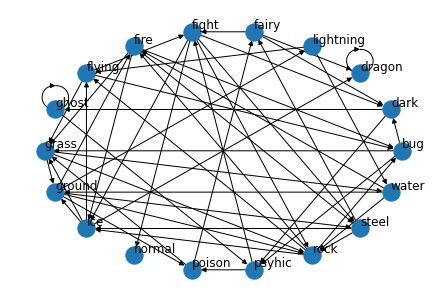

In [6]:
##pokemon graph
#Now we want to draw the network (also called graph)
Nnodes = 18
G = nx.DiGraph()
G.add_nodes_from(range(0,18))
G.add_edges_from(edges)

G = nx.relabel_nodes(G, typelabels)

nodepos = nx.circular_layout(G)
nx.draw(G,pos=nodepos, with_labels = True,  horizontalalignment='left', verticalalignment = 'bottom') #directed links mean advantageous against

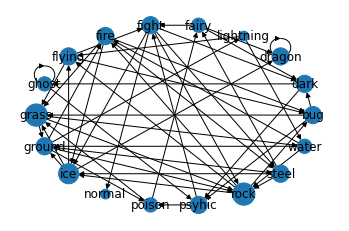

In [7]:
## This will plot the network using a radius that is proportional the elements IN degree
#we can think of this as IN degree centrality

plt.subplots(1)
in_degree = dict(G.in_degree)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*100)^4 for v in in_degree.values()])



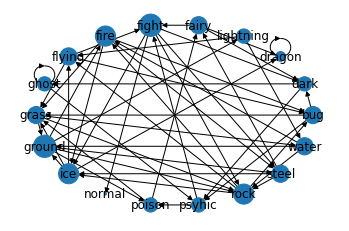

In [8]:
## This will plot the network using a radius that is proportional the elements OUT degree
#we can think of this as OUT degree centrality


plt.subplots(1)
out_degree = dict(G.out_degree)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*100)^4 for v in out_degree.values()]) #directed links mean advantageous against



In [21]:
degreesList = [val for (node, val) in G.degree()] #get a list of degrees
out_degreesList = [val for (node, val) in G.out_degree()] #get a list of out degrees
in_degreesList = [val for (node, val) in G.in_degree()] #get a list of in degrees

#print out the degree, outdegree, and indegree. They are in the same order as the names printed out
print(typelabels.values())
print(degreesList)
print(out_degreesList)
print(in_degreesList)

dict_values(['bug', 'dark', 'dragon', 'lightning', 'fairy', 'fight', 'fire', 'flying', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psyhic', 'rock', 'steel', 'water'])
[6, 5, 4, 3, 5, 8, 7, 6, 4, 8, 8, 8, 1, 4, 5, 9, 6, 5]
[3, 2, 1, 2, 3, 5, 4, 3, 2, 3, 5, 4, 0, 2, 2, 4, 3, 3]
[3, 3, 3, 1, 2, 3, 3, 3, 2, 5, 3, 4, 1, 2, 3, 5, 3, 2]


In [23]:
print(sorted(G.out_degree, key=lambda x: x[1], reverse=True)) #print the out degrees in descending order. Outdegrees are advantages, so the sooner in the list the more advantages that element has.
print(sorted(G.in_degree, key=lambda x: x[1], reverse=True)) #print the in degrees in descending order. Indegrees are weaknesses, so the sooner in the list the more weakenesses that element has.



[('fight', 5), ('ground', 5), ('fire', 4), ('ice', 4), ('rock', 4), ('bug', 3), ('fairy', 3), ('flying', 3), ('grass', 3), ('steel', 3), ('water', 3), ('dark', 2), ('lightning', 2), ('ghost', 2), ('poison', 2), ('psyhic', 2), ('dragon', 1), ('normal', 0)]
[('grass', 5), ('rock', 5), ('ice', 4), ('bug', 3), ('dark', 3), ('dragon', 3), ('fight', 3), ('fire', 3), ('flying', 3), ('ground', 3), ('psyhic', 3), ('steel', 3), ('fairy', 2), ('ghost', 2), ('poison', 2), ('water', 2), ('lightning', 1), ('normal', 1)]


In [6]:
#get the average degrees
print(np.mean(degreesList))
print(np.mean(out_degreesList))
print(np.mean(in_degreesList))

5.666666666666667
2.8333333333333335
2.8333333333333335


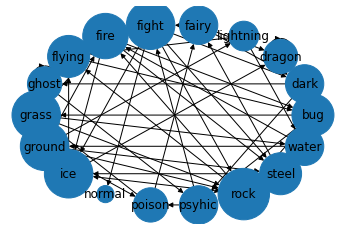

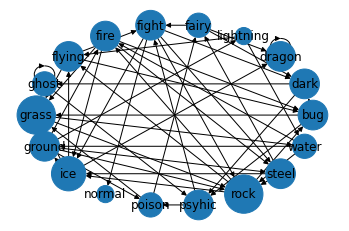

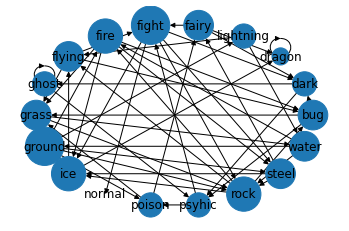

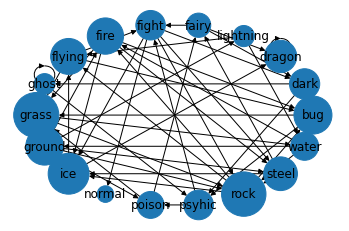

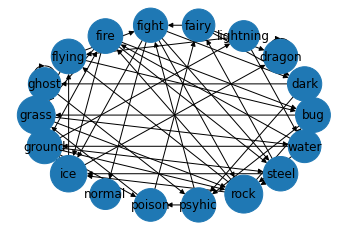

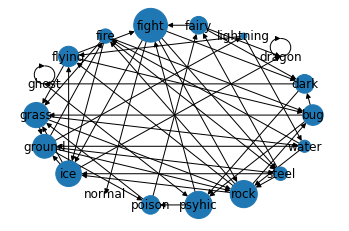

In [8]:
#Centrality Analysis
#Now we'll use different centrality measures and plot the result as the radius of the element in the network
#I can't go into what these are if you dont know them here, but there are plenty of websites that explain these in plain language.

#Degree centrality
plt.subplots(1)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.degree_centrality(G).values()]) #directed links mean advantageous against

#in-Degree centrality
plt.subplots(1)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.in_degree_centrality(G).values()]) #directed links mean advantageous against

#out-Degree centrality
plt.subplots(1)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.out_degree_centrality(G).values()]) #directed links mean advantageous against

#eigenvector centrality
plt.subplots(1)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.eigenvector_centrality(G).values()]) #directed links mean advantageous against

#Katz centrality
plt.subplots(1)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.katz_centrality(G).values()]) #directed links mean advantageous against

#betweeness centrality
plt.subplots(1)
nx.draw(G,pos=nodepos, with_labels = True, node_size = [(v*5000) for v in nx.betweenness_centrality(G).values()]) #directed links mean advantageous against




In [25]:
#Find all triangles (also called cyclic triads), like Water>Fire>Grass>Water....

G2 = G
#triad_type doesn't work if self loops are present, but we don't care about those anyway in this analysis so get rid of them
G2.remove_edges_from(nx.selfloop_edges(G2)) 

#don't worry about this stuff
count = 1;
for i in nx.all_triads(G2):
    if len(i.edges) == 3:
        #this next line is annoying. Its from a page 15/32 of a pdf linked in the documentation for triad_type.
        #pdf is here: https://web.archive.org/web/20170830032057/http://www.stats.ox.ac.uk/~snijders/Trans_Triads_ha.pdf
        if nx.triad_type(i) == '030C':  
            print(i.nodes)
            count += 1

            
#print out the triangles            
print(count)            


['rock', 'bug', 'grass']
['psyhic', 'dark', 'fight']
['water', 'ground', 'lightning']
['steel', 'fairy', 'fight']
['ice', 'flying', 'fight']
['flying', 'rock', 'fight']
['fire', 'ground', 'grass']
['fire', 'rock', 'grass']
['fire', 'water', 'grass']
['fire', 'ice', 'ground']
['fire', 'steel', 'rock']
['flying', 'rock', 'grass']
['poison', 'ground', 'grass']
['ice', 'rock', 'grass']
['rock', 'ice', 'ground']
['steel', 'ice', 'ground']
17


In [33]:
#This is to test for any 2-cycles. 0 means no 2-cycles in the network.
nx.reciprocity(G)

0.0